In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import Sequential
import numpy as np

In [25]:
# Load the trained model
base_model = tf.keras.models.load_model('cnn_model.h5')

In [26]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [4]:
from keras.utils import plot_model

plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [27]:
for i in range(len(base_model.layers)):
	# check for convolutional layer
	if 'conv' not in base_model.layers[i].name:
		continue
	# get filter weights
	filters, biases = base_model.layers[i].get_weights()
	print("layer number",i,base_model.layers[i].name, filters.shape)

layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 32)


In [6]:
# retrieving weights from 2nd layer
filters , bias = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
#f_min, f_max = filters.min(), filters.max()
#filters = (filters - f_min) / (f_max - f_min)

In [7]:
import matplotlib.pyplot as pyplot

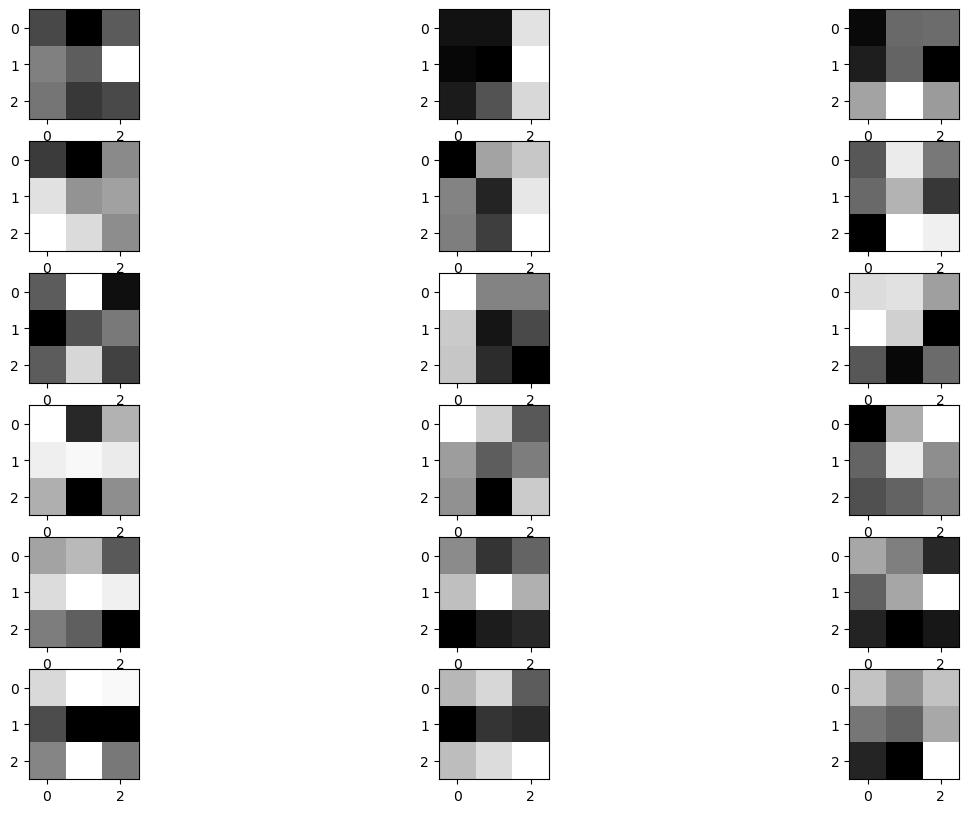

In [28]:
n_filters =6
ix=1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
pyplot.show()

In [11]:
from keras.preprocessing import image
import tensorflow as tf 
from numpy import expand_dims
from tensorflow.keras.applications.vgg16 import preprocess_input 

In [29]:
model = Model(inputs=base_model.inputs , outputs=base_model.layers[0].output)
img = image.load_img("D:/github/archive/chest_xray/chest_xray/test/PNEUMONIA/person1_virus_7.jpeg" , target_size=(224,224))

# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

img = preprocess_input(img)

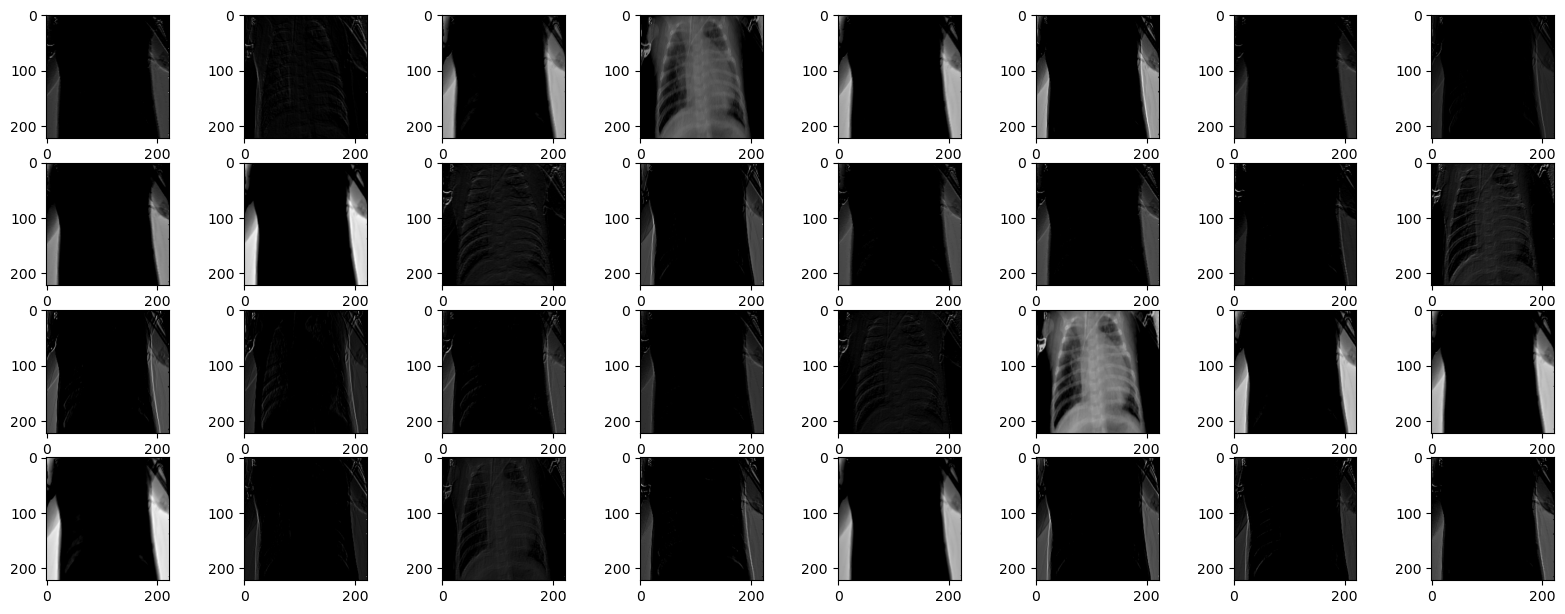

In [30]:
#calculating features_map
features = model.predict(img)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()

In [31]:
model2 = Model(inputs=model.ouput , outputs=model.layers[1].output)
img = image.load_img("D:/github/archive/chest_xray/chest_xray/test/PNEUMONIA/person1_virus_7.jpeg" , target_size=(224,224))

# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

img = preprocess_input(img)

AttributeError: 'Functional' object has no attribute 'ouput'